In [1]:
import os
import csv
import spacy
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import itertools
sns.set()
sns.set_context('talk')
palette = itertools.cycle(sns.color_palette('Set2'))
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [8.0, 6.0]
spacy.load('en_core_web_sm')
from collections import defaultdict

#parser = English()
nlp = spacy.load('en')

In [2]:
genres_df = pd.read_csv('genre_stats.csv')
genres_df = genres_df[genres_df['corpus'] == 'NYT']

In [3]:
genres_df.head()

,corpus,genre,num_words,adv_adj_counts,hapax_legomena_counts,adv_adj_freqmil,hapax_legomena_freqmil
5,NYT,1915,696,2,2,2873.563218,2873.563218
6,NYT,1916,852,0,0,0.000000,0.000000
7,NYT,1921,1060,1,1,943.396226,943.396226
8,NYT,1923,331,0,0,0.000000,0.000000
9,NYT,1924,41661,94,93,2256.306858,2232.303593


In [4]:
df = pd.DataFrame([genres_df['genre'].astype(int), genres_df['adv_adj_freqmil'].astype(int)])
df = df.transpose().rename({'genre' : 'Year', 'adv_adj_freqmil' : 'Frequency per million'}, axis=1)
df = df[df['Frequency per million'] > 0]

/home/vgautam/anaconda3/envs/usra/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


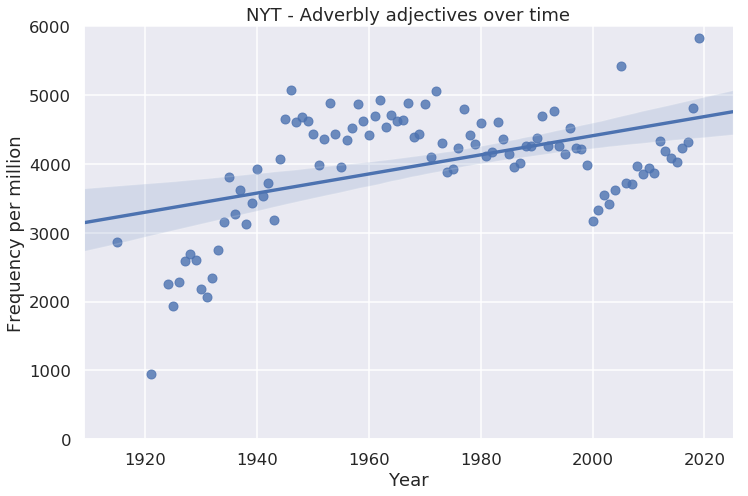

In [5]:
g = sns.lmplot('Year', 'Frequency per million', df, height=7, aspect=1.5)
g.set(ylim=(0,6000))
plt.title('NYT - Adverbly adjectives over time')
# plt.show()
plt.tight_layout()
plt.savefig('nyt_freqmil_year_regression.png')

In [6]:
df['decade'] = (np.floor(df['Year'].astype(int) / 10) * 10).astype(int)
grouped = df.groupby('decade').sum().reset_index().rename({'index' : 'decade'})

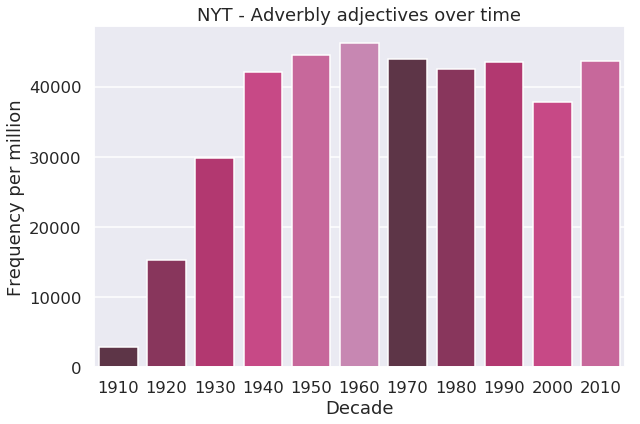

In [7]:
plt.figure(figsize=(9.0,6.0))
sns.barplot(x='decade', y='Frequency per million', data=grouped, palette=sns.color_palette('PuRd_d'))
plt.xlabel('Decade')
plt.ylabel('Frequency per million')
plt.title('NYT - Adverbly adjectives over time')
plt.tight_layout()
plt.savefig('nyt_freqmil_year.png')

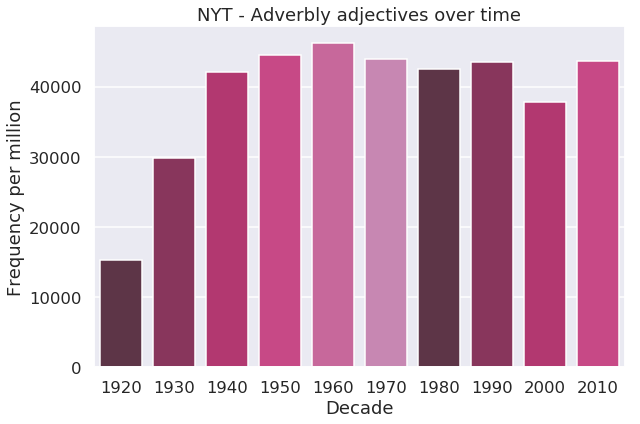

In [8]:
grouped = grouped[grouped['decade'] > 1910]

plt.figure(figsize=(9.0,6.0))
sns.barplot(x='decade', y='Frequency per million', data=grouped, palette=sns.color_palette('PuRd_d'))
plt.xlabel('Decade')
plt.ylabel('Frequency per million')
plt.title('NYT - Adverbly adjectives over time')
plt.tight_layout()
plt.savefig('nyt_freqmil_year_minus1910.png')

In [9]:
df = pd.DataFrame([genres_df['genre'].astype(int), genres_df['hapax_legomena_freqmil'].astype(int)])
df = df.transpose().rename({'genre' : 'Year', 'hapax_legomena_freqmil' : 'Frequency per million'}, axis=1)
df = df[df['Frequency per million'] > 0]

/home/vgautam/anaconda3/envs/usra/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


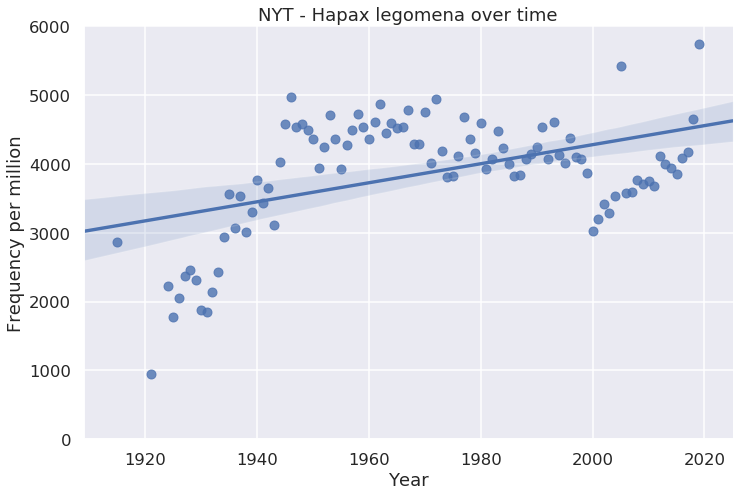

In [10]:
g = sns.lmplot('Year', 'Frequency per million', df, height=7, aspect=1.5)
g.set(ylim=(0,6000))
plt.title('NYT - Hapax legomena over time')
# plt.show()
plt.tight_layout()
plt.savefig('nyt_hapax_year_regression.png')

In [11]:
genres_df['proportion_of_unique_instances'] = genres_df['hapax_legomena_counts'] / genres_df['adv_adj_counts'] * 100
genres_df.dropna(inplace=True)
df = pd.DataFrame([genres_df['genre'].astype(int), genres_df['proportion_of_unique_instances'].astype(int)])
df = df.transpose().rename({'genre' : 'Year', 'proportion_of_unique_instances' : 'Proportion of unique combinations'}, axis=1)
df = df[df['Proportion of unique combinations'] > 0]

/home/vgautam/anaconda3/envs/usra/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


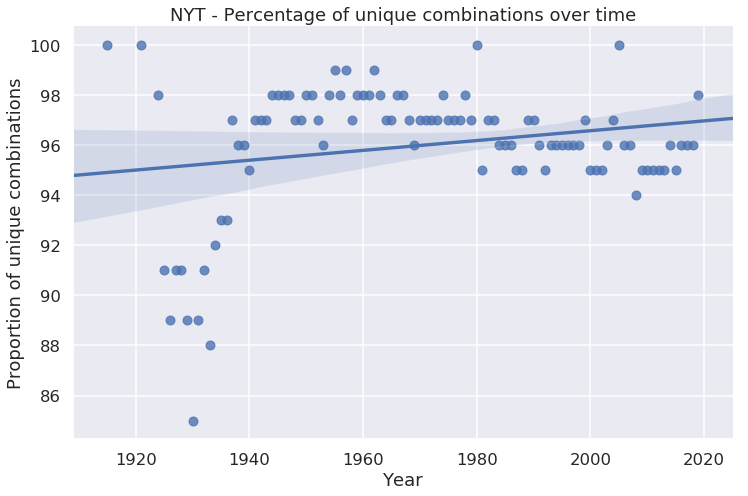

In [12]:
g = sns.lmplot('Year', 'Proportion of unique combinations', df, height=7, aspect=1.5)
# g.set(ylim=(0,120))
plt.title('NYT - Percentage of unique combinations over time')
# plt.show()
plt.tight_layout()
plt.savefig('nyt_unique_year_regression.png')